In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import numpy as np
import seaborn as sns
data = pd.read_csv("sales_data_with_discounts.csv")

In [2]:
data

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [4]:
for i,att in enumerate(data):
    print(f"{i}:{att}")

0:Date
1:Day
2:SKU
3:City
4:Volume
5:BU
6:Brand
7:Model
8:Avg Price
9:Total Sales Value
10:Discount Rate (%)
11:Discount Amount
12:Net Sales Value


In [5]:
grouped = data.groupby(['Brand'])

In [6]:
for i,j in grouped:
    print(i)
    print(j)

Babaji
           Date        Day  SKU City  Volume    BU   Brand           Model  \
10   01-04-2021   Thursday  F01    C      13  FMCG  Babaji     Babaji Oil    
13   01-04-2021   Thursday  F04    C       9  FMCG  Babaji  Babaji Shampoo   
14   01-04-2021   Thursday  F05    C       5  FMCG  Babaji    Babaji Cream   
40   02-04-2021     Friday  F01    C      29  FMCG  Babaji     Babaji Oil    
43   02-04-2021     Friday  F04    C       9  FMCG  Babaji  Babaji Shampoo   
44   02-04-2021     Friday  F05    C       7  FMCG  Babaji    Babaji Cream   
70   03-04-2021   Saturday  F01    C      24  FMCG  Babaji     Babaji Oil    
73   03-04-2021   Saturday  F04    C       6  FMCG  Babaji  Babaji Shampoo   
74   03-04-2021   Saturday  F05    C       6  FMCG  Babaji    Babaji Cream   
100  04-04-2021     Sunday  F01    C      25  FMCG  Babaji     Babaji Oil    
103  04-04-2021     Sunday  F04    C       7  FMCG  Babaji  Babaji Shampoo   
104  04-04-2021     Sunday  F05    C       6  FMCG  Babaj

C:\Users\delta\AppData\Local\Temp\ipykernel_12216\3564347986.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i,j in grouped:


# *Descriptive Analysis for numerical columns*

In [7]:
num_col = data.select_dtypes(include = ['number']).columns

In [8]:
for i,col in enumerate(num_col):
    print(f"index{i}:{col}")

index0:Volume
index1:Avg Price
index2:Total Sales Value
index3:Discount Rate (%)
index4:Discount Amount
index5:Net Sales Value


In [9]:
data.describe() #measures of central tendency of all the numerical col in the df!!!

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [10]:
obj_col = data.select_dtypes(include = ['object']).columns

In [11]:
round(data.std(numeric_only = True),2)

Volume                   4.23
Avg Price            18079.90
Total Sales Value    50535.07
Discount Rate (%)        4.22
Discount Amount       4509.90
Net Sales Value      46358.66
dtype: float64

In [12]:
round(data.var(numeric_only = True),2)

Volume               1.791000e+01
Avg Price            3.268830e+08
Total Sales Value    2.553794e+09
Discount Rate (%)    1.781000e+01
Discount Amount      2.033922e+07
Net Sales Value      2.149125e+09
dtype: float64

In [13]:
round(data.mean(numeric_only = True),2)

Volume                   5.07
Avg Price            10453.43
Total Sales Value    33812.84
Discount Rate (%)       15.16
Discount Amount       3346.50
Net Sales Value      30466.34
dtype: float64

In [14]:
data.rank()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,15.5,285.5,308.0,225.5,437.5,375.5,248.0,233.0,353.0,448.5,101.0,447.0,444.0
1,15.5,285.5,323.0,225.5,403.0,375.5,248.0,263.0,338.0,379.0,100.0,422.0,371.0
2,15.5,285.5,338.0,225.5,366.5,375.5,428.0,428.0,368.0,398.5,80.0,413.0,390.0
3,15.5,285.5,353.0,225.5,331.5,375.5,428.0,443.0,383.0,412.0,34.0,383.0,409.0
4,15.5,285.5,368.0,225.5,158.5,375.5,428.0,413.0,315.5,313.5,328.0,328.0,309.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,435.5,285.5,233.0,225.5,65.5,225.5,150.5,143.0,210.5,111.5,152.0,105.0,113.0
446,435.5,285.5,248.0,225.5,331.5,225.5,375.5,398.0,278.0,299.5,252.0,300.0,300.0
447,435.5,285.5,263.0,225.5,65.5,225.5,375.5,383.0,233.0,136.0,389.0,150.0,131.0
448,435.5,285.5,278.0,225.5,158.5,225.5,150.5,158.0,248.0,228.5,237.0,219.0,231.0


In [15]:
data.var(numeric_only = True)

Volume               1.790646e+01
Avg Price            3.268830e+08
Total Sales Value    2.553794e+09
Discount Rate (%)    1.781348e+01
Discount Amount      2.033922e+07
Net Sales Value      2.149125e+09
dtype: float64

In [16]:
data.std(numeric_only = True)

Volume                   4.231602
Avg Price            18079.904840
Total Sales Value    50535.074173
Discount Rate (%)        4.220602
Discount Amount       4509.902963
Net Sales Value      46358.656624
dtype: float64

In [17]:
data.mean(numeric_only = True)

Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate (%)       15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64

In [18]:
data.median(numeric_only = True)

Volume                  4.000000
Avg Price            1450.000000
Total Sales Value    5700.000000
Discount Rate (%)      16.577766
Discount Amount       988.933733
Net Sales Value      4677.788059
dtype: float64

In [19]:
data.Volume.mode()[0]

3

In [20]:
data['Avg Price'].mode()[0] 

400

In [21]:
data['Total Sales Value'].mode()[0]

24300

In [22]:
data['Discount Rate (%)'].mode()[0]

5.007822189204133

In [23]:
data.skew(numeric_only = True)

Volume               2.731724
Avg Price            1.908873
Total Sales Value    1.534729
Discount Rate (%)   -1.062294
Discount Amount      1.913038
Net Sales Value      1.540822
dtype: float64

In [24]:
data.kurt(numeric_only = True)

Volume               10.258547
Avg Price             2.075655
Total Sales Value     1.024916
Discount Rate (%)    -0.178541
Discount Amount       3.831186
Net Sales Value       1.012468
dtype: float64

In [25]:
# Observed high variance in 'Avg Price' column indicating it is a very important attribute
# Data has columns with High standard deviation suggesting outliers and inconsistencies in the data.
# Excess curtosis in some columns also indicates extremely sharp peaks and outliers ....
# Moderate skewness observed!

# *Data Visualization*

### *Histograms*

<Axes: ylabel='Frequency'>

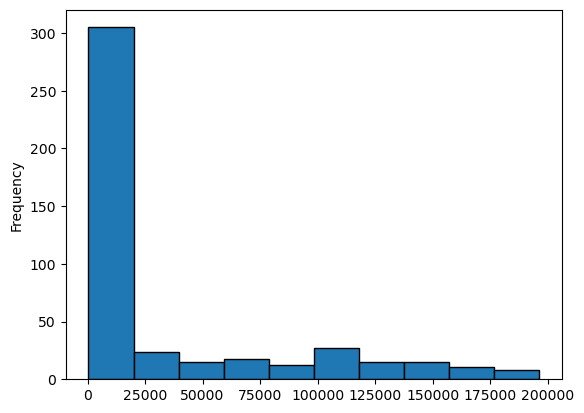

In [35]:
data['Total Sales Value'].plot(kind = 'hist',edgecolor = 'black')

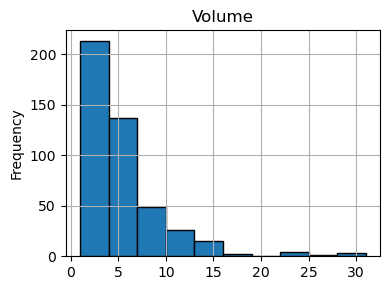

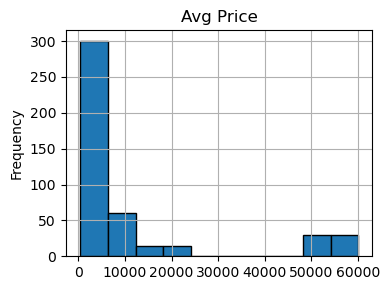

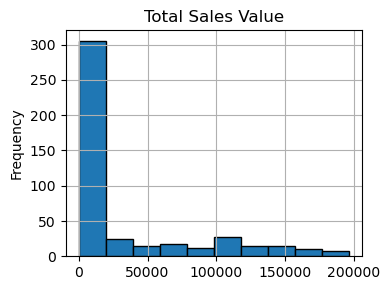

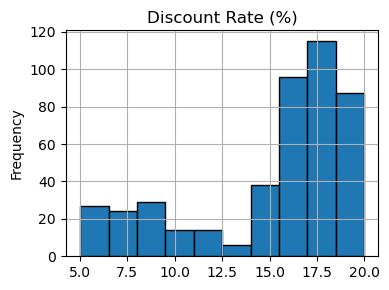

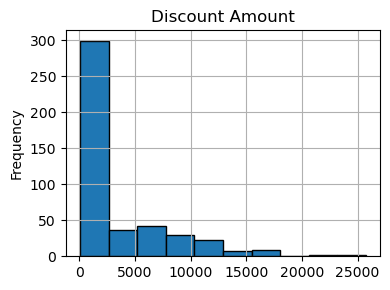

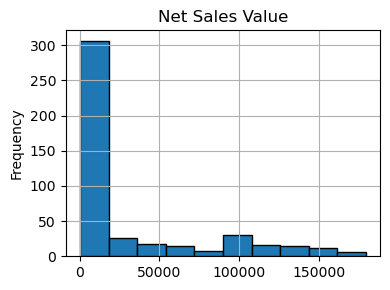

In [37]:
for i in num_col:
    plt.figure(figsize = (4,3)) #to seperate all the plots
    data[i].plot(kind = 'hist',title = i,edgecolor = 'black')
    plt.grid(True)
    plt.tight_layout()
    plt.show

In [ ]:
for i in num_col:
    plt.hist(data[i], bins=30, color='skyblue', alpha=0.6, edgecolor='black', density=True)
    sns.kdeplot(data[i], color='green', linewidth=2)
    plt.xlabel(i)
    plt.ylabel('Density')
    plt.show()


### *Boxplots*

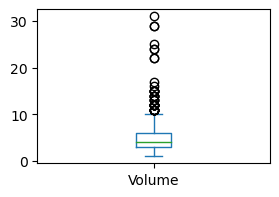

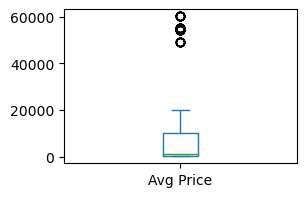

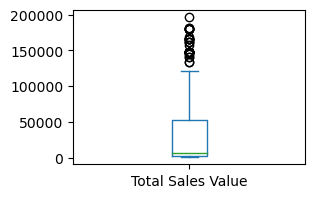

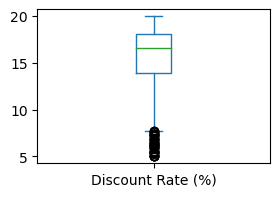

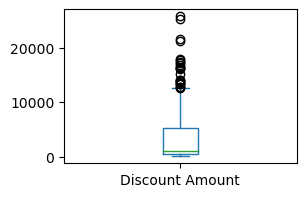

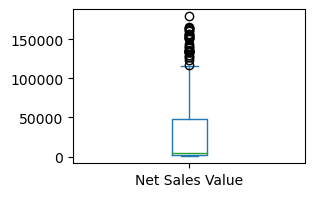

In [41]:
for i in num_col: #using pandas
    plt.figure(figsize = (3,2))
    data[i].plot(kind = 'box')

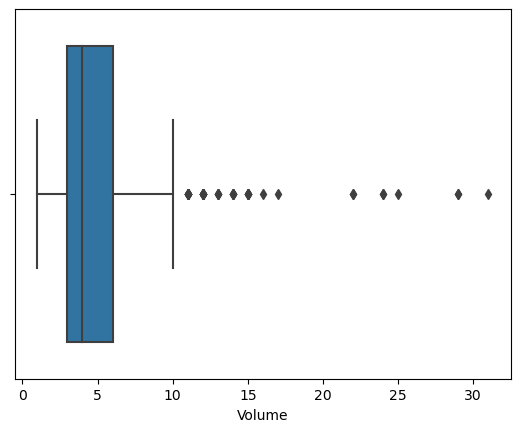

first quartile: 3.0
third quartile: 6.0
IQR: 3.0
lower bound: -1.5
upper bound: 10.5
           Date        Day  SKU City  Volume         BU   Brand  \
0    01-04-2021   Thursday  M01    C      15    Mobiles   RealU   
10   01-04-2021   Thursday  F01    C      13       FMCG  Babaji   
30   02-04-2021     Friday  M01    C      11    Mobiles   RealU   
40   02-04-2021     Friday  F01    C      29       FMCG  Babaji   
50   02-04-2021     Friday  L01    C      13  Lifestyle   Jeera   
70   03-04-2021   Saturday  F01    C      24       FMCG  Babaji   
71   03-04-2021   Saturday  F02    C      14       FMCG   Vedic   
80   03-04-2021   Saturday  L01    C      12  Lifestyle   Jeera   
100  04-04-2021     Sunday  F01    C      25       FMCG  Babaji   
101  04-04-2021     Sunday  F02    C      15       FMCG   Vedic   
102  04-04-2021     Sunday  F03    C      11       FMCG   Vedic   
130  05-04-2021     Monday  F01    C      15       FMCG  Babaji   
140  05-04-2021     Monday  L01    C      14

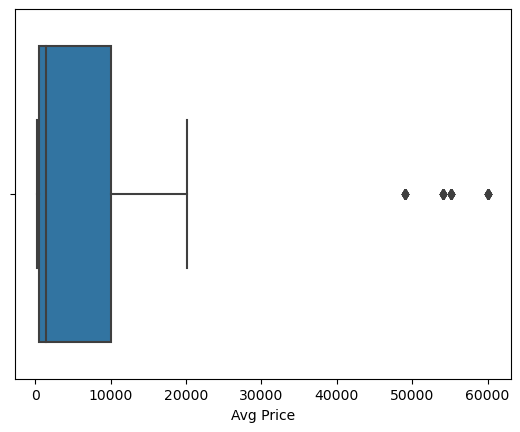

first quartile: 465.0
third quartile: 10100.0
IQR: 9635.0
lower bound: -13987.5
upper bound: 24552.5
           Date        Day  SKU City  Volume       BU    Brand Model  \
6    01-04-2021   Thursday  M07    C       3  Mobiles  Sumsang  S-20   
7    01-04-2021   Thursday  M08    C       2  Mobiles  Sumsang  S-21   
8    01-04-2021   Thursday  M09    C       2  Mobiles   Orange  O-10   
9    01-04-2021   Thursday  M10    C       3  Mobiles   Orange  O-11   
36   02-04-2021     Friday  M07    C       3  Mobiles  Sumsang  S-20   
37   02-04-2021     Friday  M08    C       1  Mobiles  Sumsang  S-21   
38   02-04-2021     Friday  M09    C       3  Mobiles   Orange  O-10   
39   02-04-2021     Friday  M10    C       3  Mobiles   Orange  O-11   
66   03-04-2021   Saturday  M07    C       4  Mobiles  Sumsang  S-20   
67   03-04-2021   Saturday  M08    C       1  Mobiles  Sumsang  S-21   
68   03-04-2021   Saturday  M09    C       1  Mobiles   Orange  O-10   
69   03-04-2021   Saturday  M10    

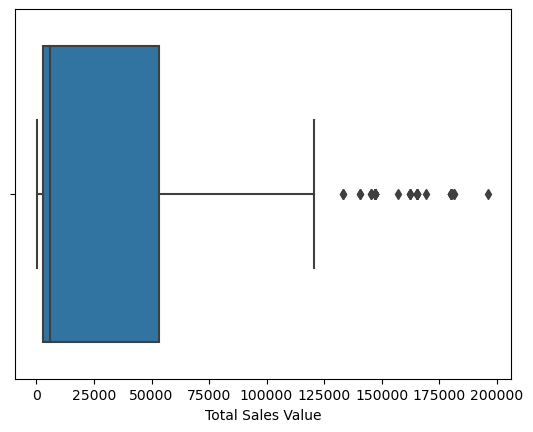

first quartile: 2700.0
third quartile: 53200.0
IQR: 50500.0
lower bound: -73050.0
upper bound: 128950.0
           Date        Day  SKU City  Volume       BU    Brand       Model  \
0    01-04-2021   Thursday  M01    C      15  Mobiles    RealU       RU-10   
6    01-04-2021   Thursday  M07    C       3  Mobiles  Sumsang        S-20   
9    01-04-2021   Thursday  M10    C       3  Mobiles   Orange        O-11   
30   02-04-2021     Friday  M01    C      11  Mobiles    RealU       RU-10   
36   02-04-2021     Friday  M07    C       3  Mobiles  Sumsang        S-20   
38   02-04-2021     Friday  M09    C       3  Mobiles   Orange        O-10   
39   02-04-2021     Friday  M10    C       3  Mobiles   Orange        O-11   
66   03-04-2021   Saturday  M07    C       4  Mobiles  Sumsang        S-20   
96   04-04-2021     Sunday  M07    C       3  Mobiles  Sumsang        S-20   
126  05-04-2021     Monday  M07    C       3  Mobiles  Sumsang        S-20   
127  05-04-2021     Monday  M08    C  

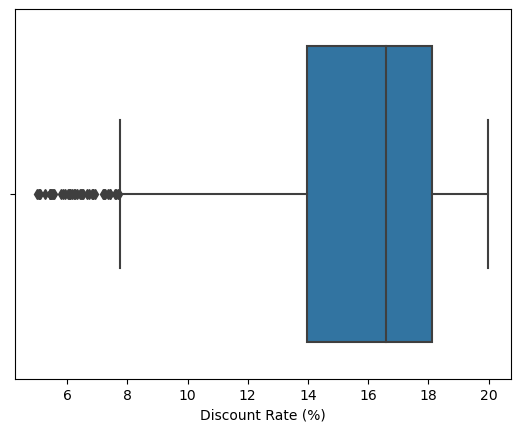

first quartile: 13.965062543701741
third quartile: 18.114718477752703
IQR: 4.149655934050962
lower bound: 7.740578642625298
upper bound: 24.339202378829146
           Date        Day  SKU City  Volume       BU    Brand       Model  \
3    01-04-2021   Thursday  M04    C       6  Mobiles     YouM  YM-99 Plus   
7    01-04-2021   Thursday  M08    C       2  Mobiles  Sumsang        S-21   
8    01-04-2021   Thursday  M09    C       2  Mobiles   Orange        O-10   
33   02-04-2021     Friday  M04    C       6  Mobiles     YouM  YM-99 Plus   
36   02-04-2021     Friday  M07    C       3  Mobiles  Sumsang        S-20   
67   03-04-2021   Saturday  M08    C       1  Mobiles  Sumsang        S-21   
69   03-04-2021   Saturday  M10    C       2  Mobiles   Orange        O-11   
93   04-04-2021     Sunday  M04    C       6  Mobiles     YouM  YM-99 Plus   
98   04-04-2021     Sunday  M09    C       2  Mobiles   Orange        O-10   
99   04-04-2021     Sunday  M10    C       2  Mobiles   Orange  

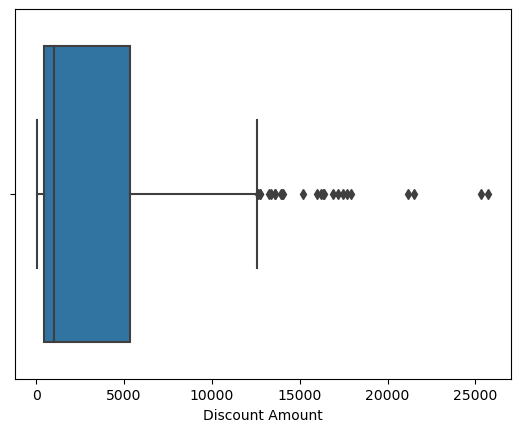

first quartile: 460.4593038855329
third quartile: 5316.4954266866525
IQR: 4856.03612280112
lower bound: -6823.594880316146
upper bound: 12600.54961088833
           Date        Day  SKU City  Volume       BU    Brand       Model  \
0    01-04-2021   Thursday  M01    C      15  Mobiles    RealU       RU-10   
6    01-04-2021   Thursday  M07    C       3  Mobiles  Sumsang        S-20   
9    01-04-2021   Thursday  M10    C       3  Mobiles   Orange        O-11   
30   02-04-2021     Friday  M01    C      11  Mobiles    RealU       RU-10   
38   02-04-2021     Friday  M09    C       3  Mobiles   Orange        O-10   
39   02-04-2021     Friday  M10    C       3  Mobiles   Orange        O-11   
66   03-04-2021   Saturday  M07    C       4  Mobiles  Sumsang        S-20   
90   04-04-2021     Sunday  M01    C       9  Mobiles    RealU       RU-10   
96   04-04-2021     Sunday  M07    C       3  Mobiles  Sumsang        S-20   
180  07-04-2021  Wednesday  M01    C      12  Mobiles    RealU    

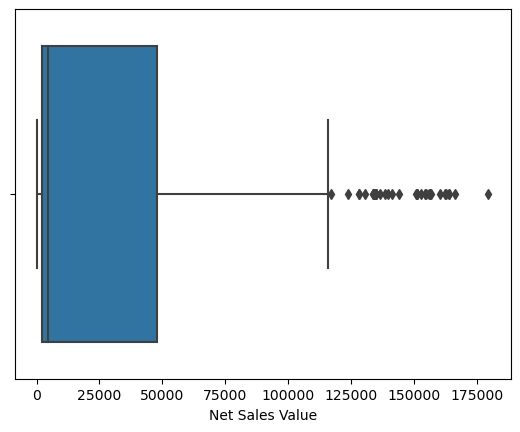

first quartile: 2202.2086453212287
third quartile: 47847.91285159138
IQR: 45645.70420627015
lower bound: -66266.347664084
upper bound: 116316.46916099661
           Date        Day  SKU City  Volume       BU    Brand       Model  \
0    01-04-2021   Thursday  M01    C      15  Mobiles    RealU       RU-10   
6    01-04-2021   Thursday  M07    C       3  Mobiles  Sumsang        S-20   
9    01-04-2021   Thursday  M10    C       3  Mobiles   Orange        O-11   
36   02-04-2021     Friday  M07    C       3  Mobiles  Sumsang        S-20   
38   02-04-2021     Friday  M09    C       3  Mobiles   Orange        O-10   
39   02-04-2021     Friday  M10    C       3  Mobiles   Orange        O-11   
66   03-04-2021   Saturday  M07    C       4  Mobiles  Sumsang        S-20   
96   04-04-2021     Sunday  M07    C       3  Mobiles  Sumsang        S-20   
126  05-04-2021     Monday  M07    C       3  Mobiles  Sumsang        S-20   
127  05-04-2021     Monday  M08    C       3  Mobiles  Sumsang    

In [74]:
for i in num_col:
    plt.figure()
    sns.boxplot(x=data[i])
    plt.show()
    q1 = data[i].quantile(0.25)
    q3 = data[i].quantile(0.75)
    iqr = (q3-q1)
    print('first quartile:',q1)
    print('third quartile:',q3)
    print('IQR:',iqr)
    lower_bound = q1-1.5*iqr
    upper_bound = q3+1.5*iqr
    print('lower bound:',lower_bound)
    print('upper bound:',upper_bound)
    outliers = data[(data[i]<lower_bound) | (data[i]>upper_bound)]
    print(outliers)
    

#### *Finding Outliers*

In [ ]:
Outliers = df[(data[i])<

### *Barcharts*

In [96]:
for i,col in enumerate(obj_col):
    print(f"{i}:{col}")

0:Date
1:Day
2:SKU
3:City
4:BU
5:Brand
6:Model


<Axes: >

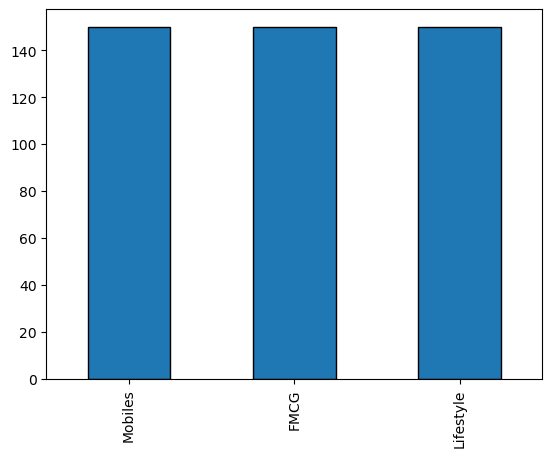

In [44]:
data.BU.value_counts().plot(kind = 'bar',edgecolor = 'black')

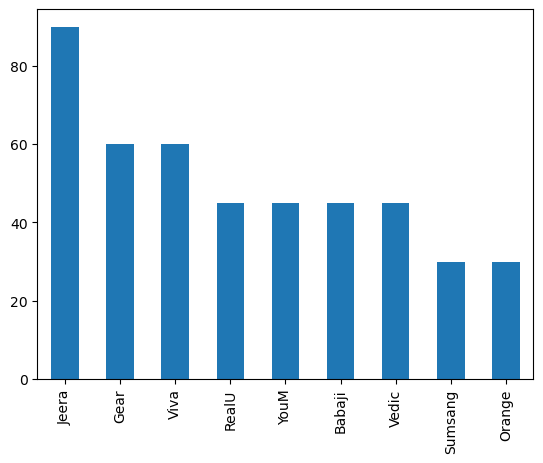

In [39]:
data.Brand.value_counts().plot(kind = 'bar')
xlabel = 'Brand'
ylabel = 'frequency'

<Axes: >

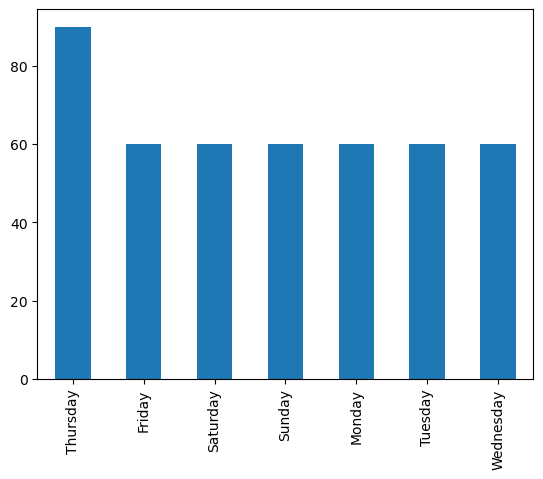

In [40]:
data.Day.value_counts().plot(kind = 'bar')

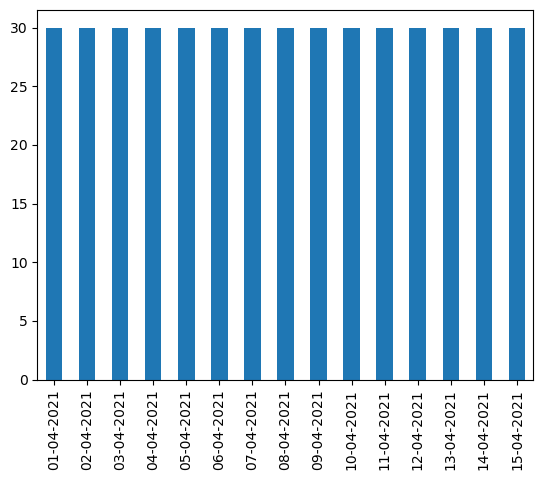

In [92]:
data.Date.value_counts().plot(kind = 'bar')
xlabel = 'Brand'
ylabel = 'frequency'

## *One - Hot Encoding*

In [77]:
for i,col in enumerate(obj_col):
    print(f'{i}:{col}')

0:Date
1:Day
2:SKU
3:City
4:BU
5:Brand
6:Model


In [86]:
data['Day'].unique()

array(['Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday',
       'Wednesday'], dtype=object)

In [87]:
data['SKU'].unique()

array(['M01', 'M02', 'M03', 'M04', 'M05', 'M06', 'M07', 'M08', 'M09',
       'M10', 'F01', 'F02', 'F03', 'F04', 'F05', 'F06', 'F07', 'F08',
       'F09', 'F10', 'L01', 'L02', 'L03', 'L04', 'L05', 'L06', 'L07',
       'L08', 'L09', 'L10'], dtype=object)

In [88]:
data['City'].unique()

array(['C'], dtype=object)

In [89]:
data['Brand'].unique()

array(['RealU', 'YouM', 'Sumsang', 'Orange', 'Babaji', 'Vedic', 'Gear',
       'Jeera', 'Viva'], dtype=object)

In [90]:
data['Model'].unique()

array(['RU-10', 'RU-9 Plus', 'YM-99', 'YM-99 Plus', 'YM-98 ', 'RU-9',
       'S-20', 'S-21', 'O-10', 'O-11', 'Babaji Oil ', 'Vedic Cream',
       'Vedic Shampoo', 'Babaji Shampoo', 'Babaji Cream', 'Vedic Oil',
       'Gear Oil', 'Gear Cream', 'Gear Shampoo', 'Gear BB Cream',
       'M- T Shirts', 'M- Inners', 'W-Casuals', 'W-Inners', 'M-Jeans',
       'M-Casuals', 'W-Western', 'W-Lounge', 'M-Formals', 'M-Shoes'],
      dtype=object)

In [91]:
data['BU'].unique()

array(['Mobiles', 'FMCG', 'Lifestyle'], dtype=object)

In [97]:
data['SKU'].unique()

array(['M01', 'M02', 'M03', 'M04', 'M05', 'M06', 'M07', 'M08', 'M09',
       'M10', 'F01', 'F02', 'F03', 'F04', 'F05', 'F06', 'F07', 'F08',
       'F09', 'F10', 'L01', 'L02', 'L03', 'L04', 'L05', 'L06', 'L07',
       'L08', 'L09', 'L10'], dtype=object)

In [98]:
#encoding significant categortical colmn...Brand,BU,Day
df = data.drop(columns = (['Date','City','Model','SKU']))

,Day,Volume,BU,Brand,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,Thursday,15,Mobiles,RealU,12100,181500,11.654820,21153.498820,160346.501180
1,Thursday,10,Mobiles,RealU,10100,101000,11.560498,11676.102961,89323.897039
2,Thursday,7,Mobiles,YouM,16100,112700,9.456886,10657.910157,102042.089843
3,Thursday,6,Mobiles,YouM,20100,120600,6.935385,8364.074702,112235.925298
4,Thursday,3,Mobiles,YouM,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...
445,Thursday,2,Lifestyle,Jeera,1300,2600,15.475687,402.367873,2197.632127
446,Thursday,6,Lifestyle,Viva,2600,15600,17.057027,2660.896242,12939.103758
447,Thursday,2,Lifestyle,Viva,1600,3200,18.965550,606.897606,2593.102394
448,Thursday,3,Lifestyle,Jeera,1900,5700,16.793014,957.201826,4742.798174


In [124]:
encode = pd.get_dummies(df,drop_first = False)
encode

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,...,BU_Mobiles,Brand_Babaji,Brand_Gear,Brand_Jeera,Brand_Orange,Brand_RealU,Brand_Sumsang,Brand_Vedic,Brand_Viva,Brand_YouM
0,15,12100,181500,11.654820,21153.498820,160346.501180,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,10,10100,101000,11.560498,11676.102961,89323.897039,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,7,16100,112700,9.456886,10657.910157,102042.089843,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,6,20100,120600,6.935385,8364.074702,112235.925298,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,3,8100,24300,17.995663,4372.946230,19927.053770,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,2,1300,2600,15.475687,402.367873,2197.632127,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
446,6,2600,15600,17.057027,2660.896242,12939.103758,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
447,2,1600,3200,18.965550,606.897606,2593.102394,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
448,3,1900,5700,16.793014,957.201826,4742.798174,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
